In [1]:
import uproot as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from global_settings import * 
from df_utils import * 
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
run = "run3"
dm_type = "fermion"
ratio = "0.6"
data = True 
create_hists=True
target_pot = 1.
signal_pot = {}
extra_scaling = 0.02

#Scaled to the observed upper limit 
signal_limit_scaling = (0.000000115393037788935/(0.001)**2)**2


if(not data):
    extra_scaling = 20.
    signal_limit_scaling = (0.000000115393037788935/(0.001)**2)**2

signal_correction = { "0.01":0.94903385, "0.02":1.03561568, "0.03":1.02326517, "0.04":1.00641579, 
                     "0.05":1.00650082, "0.06":1.01293082, "0.07":1.07433777, 
                     "0.08":1.10175345, "0.09":1.0415591 , "0.10":1.1014797}

if(dm_type == "fermion"):
    signal_pot = { "0.01":1.06e20, "0.02":9.44e+20, "0.03":4.02e+21, 
                  "0.04":1.5e+22, "0.05":5.03e+22, "0.06":1.57e+23,
                  "0.07":4.6e+23, "0.08":1.37e+24, 
                  "0.09":2.77e+24, "0.10":6.62e+24}

else: 
    signal_pot = { "0.01":8.8e+20, "0.02": 9.05e+21, "0.03":4.7e+22, 
                  "0.04":1.8e+23, "0.05":7.7e+23, "0.06":2.7e+24,
                  "0.07":7.9e+24, "0.08":2.34e+25, 
                  "0.09":3.9e+25, "0.10":8.8e+25}

scalings = {}

if(run == "run1"):
    run_flag = "Run 1"
    target_pot = 2.2e20
    scalings = scalings_run1
    pot_label = r', $2.2\times10^{20}$ POT'
    my_custom_bins = [ 0., 1.375, 2.75, 4.125, 5.5, 11.] # Last four bins merged bc of low stats
    final_custom_bins = [ 0., 1.375, 2.75, 4.125, 5.5, 6.875] # One final overflow bin 
    meson_correction_pi0 = meson_scalings["pi0"]
    meson_correction_eta = meson_scalings["eta"]
else:
    run_flag = "Run 3"
    target_pot = 5.0e20
    scalings = scalings_run3
    pot_label = r', $5.0\times10^{20}$ POT'
    my_custom_bins = [ 0., 1.375, 2.75, 4.125,5.5,11.] # Last four bins merged bc of low stats
    final_custom_bins = [ 0., 1.375, 2.75, 4.125, 5.5, 6.875] # One final overflow bin
    meson_correction_pi0 = meson_scalings["pi0"]
    meson_correction_eta = meson_scalings["eta"]



In [3]:
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/" + run + "_samples/" 
plots_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/data_mc/"

mass_a = "0.01"
mass_b = "0.05"
mass_c = "0.2"

# Open signal histogram:

signal_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/{}_signal/".format(run)
signal_file = u.open(signal_dir + "{}_ratio_{}_signal_hist_{}_CNN.root".format(dm_type,ratio,run))
(counts_signal_a, bins_final) = signal_file["signal_"+mass_a].to_numpy()
(counts_signal_b, bins_signal_b) = signal_file["signal_"+mass_b].to_numpy()
(counts_signal_c, bins_signal_c) = signal_file["signal_"+mass_c].to_numpy()

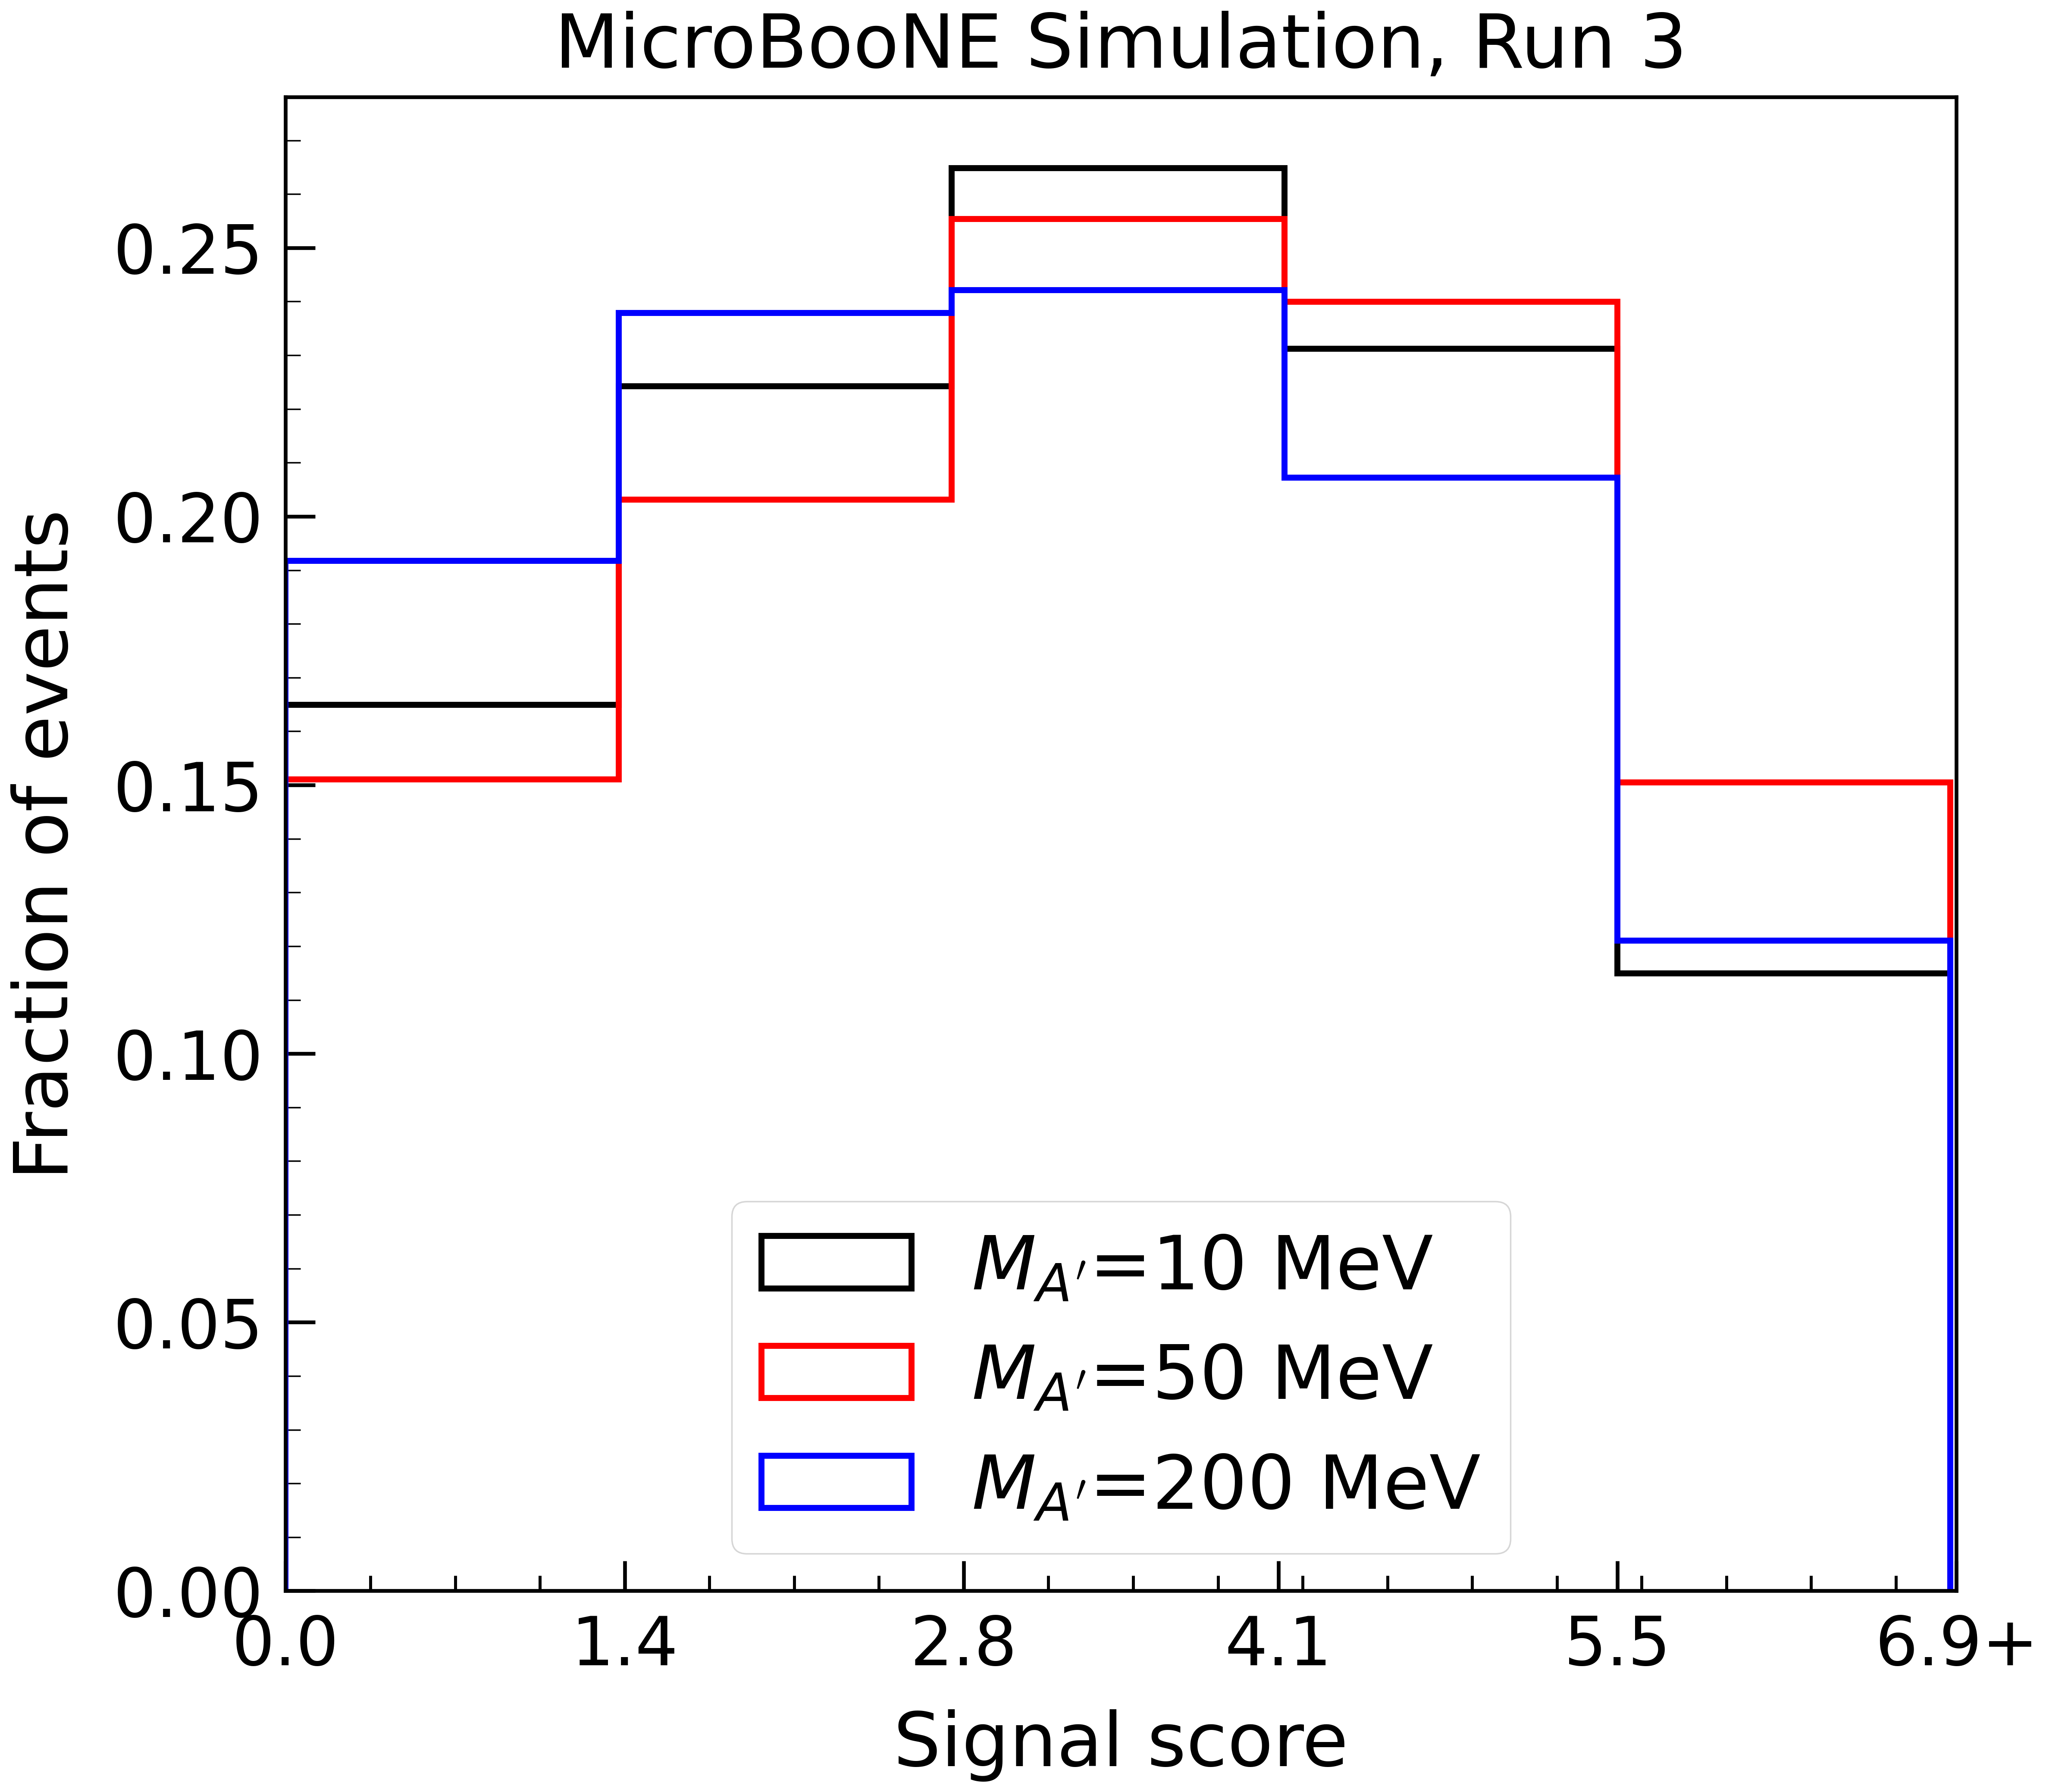

In [6]:

up_plot = 6.875
down_plot = 0.

fig, ax = plt.subplots(1,1,figsize=(20,18),dpi=250)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.hist(bins_final[:-1], bins = bins_final,weights=counts_signal_a/np.sum(counts_signal_a), histtype='step',label=r'$M_{A^\prime}$=10 MeV' ,fill=False, edgecolor='black', linewidth=4)
ax.hist(bins_final[:-1], bins = bins_final,weights=counts_signal_b/np.sum(counts_signal_b), histtype='step',label=r'$M_{A^\prime}$=50 MeV' ,fill=False, edgecolor='red', linewidth=4)
ax.hist(bins_final[:-1], bins = bins_final,weights=counts_signal_c/np.sum(counts_signal_c), histtype='step',label=r'$M_{A^\prime}$=200 MeV' ,fill=False, edgecolor='blue', linewidth=4)   
ax.set_xlim(down_plot,up_plot)
ax.legend(fontsize=50,loc='lower center')
ax.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=15, labelsize=45)
ax.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=45)
ax.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=15, bottom=True,top=False,labelbottom=True,  labelsize=45)
ax.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=True,  labelsize=45)
ax.set_xticks(np.round(bins_final,1))
ax.set_xticklabels(["0.0", "1.4", "2.8", "4.1", "5.5", "6.9+"])
ax.set_ylabel("Fraction of events",fontsize=50, labelpad=20) 
ax.set_xlabel(r'Signal score',fontsize=50,labelpad=20)
plt.title(r'MicroBooNE Simulation, Run 3',fontsize=50,pad=20)
plt.savefig(plots_dir + "CNN_distributions_" + run + "_diff_masses_box.pdf",bbox_inches="tight")
plt.savefig(plots_dir + "CNN_distributions_" + run + "_diff_masses_box.png",bbox_inches="tight")